### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as ply
import warnings

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [234]:
warnings.filterwarnings('ignore')
data = pd.read_csv('data/coupons.csv')

In [235]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [237]:
data.shape

(12684, 26)

In [238]:
# Check if any null values exists
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [239]:
# Check all the unique values in each field
for key in data.keys():
    print ('Field:' ,key ,":",data[key].unique())

Field: destination : ['No Urgent Place' 'Home' 'Work']
Field: passanger : ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Field: weather : ['Sunny' 'Rainy' 'Snowy']
Field: temperature : [55 80 30]
Field: time : ['2PM' '10AM' '6PM' '7AM' '10PM']
Field: coupon : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Field: expiration : ['1d' '2h']
Field: gender : ['Female' 'Male']
Field: age : ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Field: maritalStatus : ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Field: has_children : [1 0]
Field: education : ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Field: occupation : ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media

3. Decide what to do about your missing data -- drop, replace, other...

In [240]:
#About 99% of the data in the car field is empty
#We can drop this field
data.drop(columns=['car'],inplace=True)
data.shape

(12684, 25)

In [129]:
# Replace null values to never 
data.fillna({'Bar':'never','CoffeeHouse':'never','CarryAway':'never',
                 'RestaurantLessThan20':'never','Restaurant20To50':'never'},inplace=True)
data.replace('never','0',inplace=True)
data.replace('less1','<1',inplace=True)
data.replace('gr8','>8',inplace=True)
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [130]:
coupon_acceptance_perc = data['Y'].mean() 
print('Coupon Acceptance Rate:',round(coupon_acceptance_perc,2))

Coupon Acceptance Rate: 0.57


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Distribution')

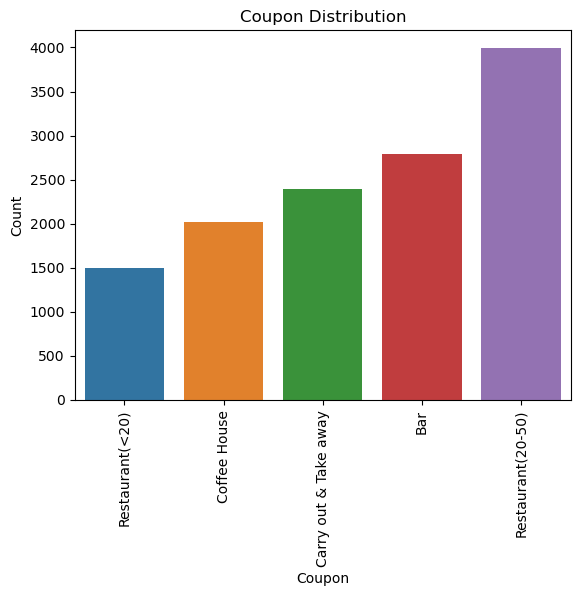

In [131]:
coupon_barplt = sns.barplot(x=data['coupon'].unique(),y=data['coupon'].value_counts(ascending=True))
plt.xticks(rotation=90)
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Coupon Distribution')

Findings : People uses coupon mostly on the High-end restaurants. 


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Effect of Temperature on the Coupon(Y)')

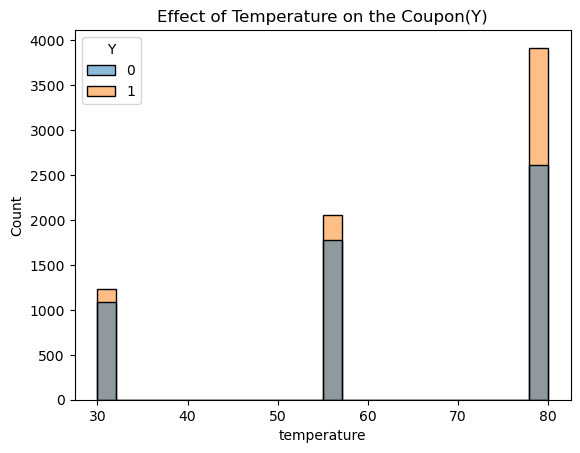

In [149]:
sns.histplot(data=data,x='temperature',hue='Y')
plt.title('Effect of Temperature on the Coupon(Y)')

Finding:
    Higher the temperature, more coupons are available to use for the customers. Also more coupons being used in the high temperature. 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [133]:
bar_df = data.query('coupon=="Bar"')

2. What proportion of bar coupons were accepted?


In [134]:
#Average of bar coupon accepted
avg_bar_coupon = bar_df.groupby('Y').size().reset_index()
fig = ply.pie(avg_bar_coupon, values=0, title='Bar Coupon Usage %',
              names='Y')
fig.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [160]:
# Remove customers that did not used Bar coupons 
bar_coupon = bar_df[bar_df['Bar'] != '0']
# Replace '1~3' and '<1' to '<3'
bar_coupon = bar_coupon.replace('<1','<3').replace('1~3','<3')
# Replace '4~8' and 'gt8' to '>4'
bar_coupon = bar_coupon.replace('gt8','>4').replace('4~8','>4')
# Average coupons acceptance by bar type
avg_bar_coupon = bar_coupon.groupby('Bar')[['Y']].sum().reset_index()
bar_df_barplt = ply.bar(avg_bar_coupon, x="Bar", y="Y",  text_auto=True,
                       labels = {'Y':'Acceptance Rate(Y)','Bar':'Frequency of Bar Visits'},title = 'Bar Coupons Acceptance Rate by Bar Frequency',
                       color='Bar')
bar_df_barplt.update_layout(
    autosize=False,
    width=500,
    height=500
)
bar_df_barplt.show()


Finding: Customers who visited the bar less than 3 times a month tend to use bar coupon more than others.
Improvement:If the customers are weekend bar visitors, the company can promote the coupons more during the weekend.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [136]:
#Boolean field that shows whether the bar coupon visit is more than once and age>25

bar_df['bar_age_over_25_gr1'] =((bar_df['Bar'] != "0" ) & \
                                (bar_df['Bar'] != "<1" ) &\
                                (bar_df['age']!= "21") & \
                                (bar_df['age']!="below21") &\
                                 (bar_df['Y']==1))
bar_df_age= bar_df.groupby('bar_age_over_25_gr1')['Y'].sum().reset_index()
bar_df_age['average'] = bar_df_age['Y']/bar_df.shape[0]
bar_df_age = bar_df_age.replace(True, 'Age>25').replace(False,'Age<25')
fig1 = ply.pie(bar_df_age,names = "bar_age_over_25_gr1", 
            values='average', 
            title='Overall Bar Coupon Usage by Age %'
       )

fig1.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig2 = ply.bar(bar_df_age,
                        x="bar_age_over_25_gr1", y="Y",  text_auto=True,
                        labels = {'Y':'Sum(Y)',
                                  'bar_age_over_25_gr1':'Age Range'},
                        title = 'Bar Coupons Acceptance Rate by Age')

fig2.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig1.show()
fig2.show()

Finding : Young customers uses the bar coupon more than the customers older than 25.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [137]:
# Filtering the dataset based on the conditions
bar_df['bar_with_passenger'] =(bar_df['Bar'] != "0" ) & \
                                (bar_df['Bar'] != "<1" ) &\
                                (bar_df['passanger']!= "Kid(s)") & \
                                (bar_df['passanger']!="Alone") &\
                                (bar_df['occupation']!='Farming Fishing & Forestry') &\
                                 (bar_df['Y']==1)
# Grouping the result to get the total count of customers who goes to the bar
bar_df_avg_passenger = bar_df[['bar_with_passenger','Y']].groupby('bar_with_passenger')['Y'].sum().reset_index()
bar_df_avg_passenger['average'] = bar_df_avg_passenger['Y']/bar_df.shape[0]
#Replacing the boolean values to understandable text 
bar_df_avg_passenger = bar_df_avg_passenger.replace(True, 'DriversWithFriendORPartner')\
                                .replace(False,'DriverWithKidORAlone')
fig3 = ply.pie(bar_df_avg_passenger,names = "bar_with_passenger", 
            values='average', 
            title='Overall Bar Coupon Usage by Passanger %'
       )

fig3.update_layout(
    autosize=False,
    width=500,
    height=500
)
bar_df_avg_passenger = ply.bar(bar_df_avg_passenger,
                                x="bar_with_passenger", y="Y",  text_auto=True,
                                labels = {'Y':'Sum(Y)','bar_with_passenger':''},
                                title = 'Bar Coupons Acceptance by Passanger')
bar_df_avg_passenger.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig3.show()
bar_df_avg_passenger.show()

Findings: Customers visits the bar alone accepts coupon more than the customer who visits with a Friend or Partner.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [140]:
bar_df['bar_with_partner_friends'] =(bar_df['Bar'] != "0" ) & \
                                (bar_df['Bar'] != "<1" ) &\
                                (bar_df['passanger']!= "Kid(s)") & \
                                (bar_df['passanger']!="Alone") &\
                                (bar_df['maritalStatus']!='Widowed') &\
                                 (bar_df['Y']==1)
bar_df['bar_with_ageunder30'] =(bar_df['Bar'] != "0" ) & \
                                (bar_df['Bar'] != "<1" ) &\
                                (~bar_df['age'].isin(['21','26','below21'])) & \
                                 (bar_df['Y']==1)
bar_df['bar_with_cheap_restaurant'] =(bar_df['income'].isin(['$12500 - $24999','$37500 - $49999'\
                                                     ,'$25000 - $37499'])&\
                                (bar_df['RestaurantLessThan20'].isin(['4~8','gt8'])) & \
                                 (bar_df['Y']==1))
bar_coupons_df = bar_df[['bar_with_partner_friends','bar_with_ageunder30','bar_with_cheap_restaurant']]
fig3 = ply.pie(bar_df,names = bar_coupons_df.columns, 
            values=bar_coupons_df.sum(), 
            title='Overall Bar Coupon Usage by Passanger %'
       )

fig3.update_layout(
    autosize=False,
    width=500,
    height=500
)

Findings: Although the bar goers under that age 30 using more coupons than the others we do not see big difference in these categories.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [142]:
bar_observations = bar_df[['bar_with_partner_friends','bar_with_ageunder30',
                           'bar_with_cheap_restaurant','bar_with_passenger','bar_age_over_25_gr1']]\
                            .replace(True,1).replace(False,0)
fig = ply.imshow(bar_observations.corr(),text_auto=True)
fig.show()

Findings : Higher correlation between bar goers with age under 30 and bar goers over the age of 25 with greater than 1's a month bar visitors.  

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

What age group uses the restaurant(20-50) coupons?
    1 .Filter the Restaurant(20-50) coupons 
    2. Get the age of the customers who accepted the coupon (Y=1)

In [181]:
rst_df = data.query('coupon=="Restaurant(<20)"')

(2786, 25)

<Axes: title={'center': 'Restaurant(<20) users by Age Group'}, xlabel='age'>

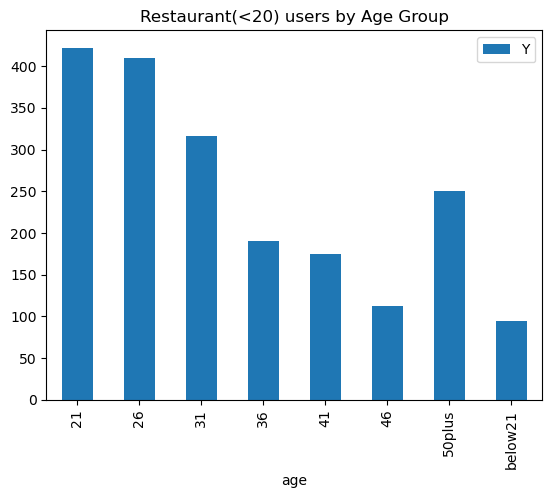

In [202]:
rst_df.groupby('age')[['age','Y']].sum('Y').plot(kind='bar',title = 'Restaurant(<20) users by Age Group')


Findings : Customers with Age between 21 and 31 uses the Restaurant(<20) coupons.

How to promote coupon based on the age group?

[Text(0.5, 1.0, 'Coupon usage by age group')]

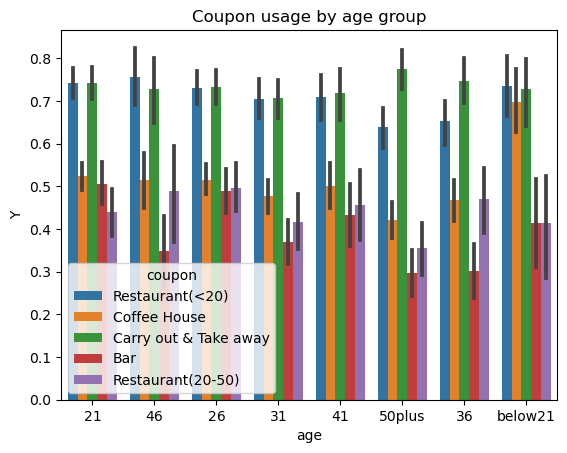

In [242]:
sns.barplot(x = 'age',
            y = 'Y',
            hue = 'coupon',
            data = data).set(
            title = 'Coupon usage by Age group'
           )

Findings :
1. Customers with the "Age over 50" uses "Carry Out & Take away" coupons more
2. Customers with the 'Age below 21" uses "Restaurant(<20)" coupons more
3. Coffee House coupons are more used with the Age below 21
4. Age group between 21-26 uses more Bar coupons


How does the driving direction affect the coupon usage?

In [217]:
data[['Y','direction_opp','direction_same']].groupby('Y').sum().reset_index()


,Y,direction_opp,direction_same
0,0,4336,1138
1,1,5624,1586


Findings  : It is not guaranteed that driving direction affect the coupon acceptance.

In [230]:
coupon_df = data[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','Y']].groupby('Y').sum().reset_index()
coupon_df

,Y,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
0,0,5474,3328,863
1,1,7210,3794,648


Findings: Coupons acceptance rate is high within 5minutes of the coupon received by the customer. Chances of accepting the coupon is less after 15 mins.